In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To split data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import KFold

In [171]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Preparation:

- Keep only the columns above
- Lowercase the column names and replace spaces with underscores
- Fill the missing values with 0
- Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average
- Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [172]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [173]:
df.drop(['Engine Fuel Type', 'Driven_Wheels', 'Number of Doors', 'Market Category',
         'Vehicle Size', 'Popularity'], axis=1, inplace = True)

In [174]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [175]:
# Lowercase the column names and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [176]:
# Fill the missing values with 0
df = df.fillna(0)

In [177]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [178]:
mean_msrp = df.msrp.mean()

In [179]:
# Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average
df[df.msrp < mean_msrp]

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,Coupe,28,18,31200
7,BMW,1 Series,2012,300.0,6.0,MANUAL,Coupe,28,20,39300
...,...,...,...,...,...,...,...,...,...,...
11886,BMW,Z3,2001,225.0,6.0,MANUAL,2dr Hatchback,26,19,37700
11887,BMW,Z3,2002,225.0,6.0,MANUAL,Convertible,26,19,37900
11888,BMW,Z3,2002,184.0,6.0,MANUAL,Convertible,25,18,31300
11889,BMW,Z3,2002,225.0,6.0,MANUAL,2dr Hatchback,26,19,37700


In [180]:
df.msrp > mean_msrp

0         True
1         True
2        False
3        False
4        False
         ...  
11909     True
11910     True
11911     True
11912     True
11913    False
Name: msrp, Length: 11914, dtype: bool

In [181]:
df['above_average'] = df.msrp > mean_msrp
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,True
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,True
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,False
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,False
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,False


In [182]:
# convert above average to binary
df.above_average = df.above_average.astype(int)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


#### Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [183]:
# Spit data
df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

# Split full train dataset again into validation and train
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state = 1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Set target variables
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

# Delete target and msrp from datasets
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [184]:
df_train.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg'],
      dtype='object')

In [185]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

## Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the above_average variable
- Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- engine_hp
- engine_cylinders
- highway_mpg
- city_mpg


In [186]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7148 entries, 0 to 7147
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7148 non-null   object 
 1   model              7148 non-null   object 
 2   year               7148 non-null   int64  
 3   engine_hp          7148 non-null   float64
 4   engine_cylinders   7148 non-null   float64
 5   transmission_type  7148 non-null   object 
 6   vehicle_style      7148 non-null   object 
 7   highway_mpg        7148 non-null   int64  
 8   city_mpg           7148 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 502.7+ KB


In [189]:
# Declare features
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg',
            'city_mpg']

categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [190]:
df_train[numerical]

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
0,2016,280.0,6.0,28,27
1,2014,300.0,6.0,30,18
2,2016,259.0,4.0,27,19
3,2015,280.0,6.0,25,17
4,2016,283.0,6.0,25,17
...,...,...,...,...,...
7143,2015,148.0,4.0,33,24
7144,2016,325.0,6.0,24,17
7145,2017,130.0,4.0,37,32
7146,1991,162.0,5.0,20,16


In [191]:
roc_auc_score(y_train, df_train['year'])

0.687551492804683

In [192]:
for c in numerical:
   print('{0}: {1}'.format(c, roc_auc_score(y_train, df_train[c]))) 

year: 0.687551492804683
engine_hp: 0.9171031265539011
engine_cylinders: 0.766116490165669
highway_mpg: 0.3669412128227987
city_mpg: 0.3265755356754767


In [193]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('{0}: {1}'.format(c, auc))                           

year: 0.687551492804683
engine_hp: 0.9171031265539011
engine_cylinders: 0.766116490165669
highway_mpg: 0.6330587871772013
city_mpg: 0.6734244643245233


## Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.678
- 0.779
- 0.878
- 0.979

In [194]:
# Convert values to dictionary and then create Sparse matrix for regression
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# Train model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [195]:
# Convert validation data into matrix for regression
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

# Make prediction from model using validation dataset
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.6109101 , 0.02041821, 0.4907932 , ..., 0.00663886, 0.99998348,
       0.08429993])

In [197]:
roc_auc_score(y_val, y_pred).round(3)

0.976

## Question 3: Precision and Recall
Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

At which threshold precision and recall curves intersect?

0.28
0.48
0.68
0.88

In [200]:
# Define threshold
t = np.linspace(0, 1, 101)
t

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [201]:
def conf_mat(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()        
        
        scores.append((t, tp, fp, fn, tn))
    
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns = columns)
    
    return df_scores

In [203]:
df_scores = conf_mat(y_val, y_pred)

In [205]:
df_scores.head()

,threshold,tp,fp,fn,tn
0,0.00,654,1729,0,0
1,0.01,652,854,2,875
2,0.02,651,702,3,1027
3,0.03,651,618,3,1111
4,0.04,650,559,4,1170


In [204]:
p = df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])
p

0      0.274444
1      0.432935
2      0.481153
3      0.513002
4      0.537634
         ...   
96     0.996078
97     1.000000
98     1.000000
99     1.000000
100         NaN
Length: 101, dtype: float64

In [206]:
df_scores['p'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])
df_scores['r'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
df_scores.head()

,threshold,tp,fp,fn,tn,p,r
0,0.00,654,1729,0,0,0.274444,1.000000
1,0.01,652,854,2,875,0.432935,0.996942
2,0.02,651,702,3,1027,0.481153,0.995413
3,0.03,651,618,3,1111,0.513002,0.995413
4,0.04,650,559,4,1170,0.537634,0.993884


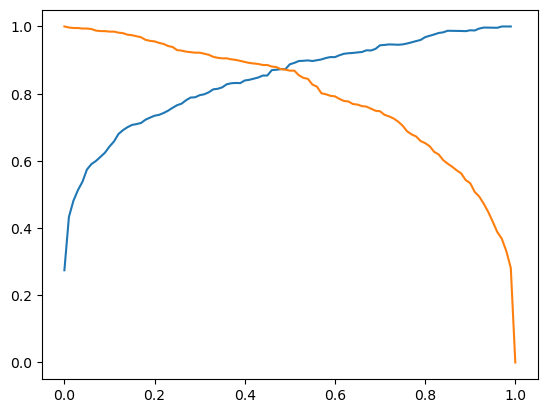

In [209]:
plt.plot(df_scores.threshold,  df_scores.p)
plt.plot(df_scores.threshold,  df_scores.r)

## Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

 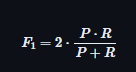

Where 
 is precision and 
 is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

0.12
0.32
0.52
0.72


In [210]:
df_scores['f1'] = 2 * ((df_scores.p * df_scores.r) /(df_scores.p + df_scores.r))
df_scores.head()

,threshold,tp,fp,fn,tn,p,r,f1
0,0.00,654,1729,0,0,0.274444,1.000000,0.430688
1,0.01,652,854,2,875,0.432935,0.996942,0.603704
2,0.02,651,702,3,1027,0.481153,0.995413,0.648729
3,0.03,651,618,3,1111,0.513002,0.995413,0.677067
4,0.04,650,559,4,1170,0.537634,0.993884,0.697799


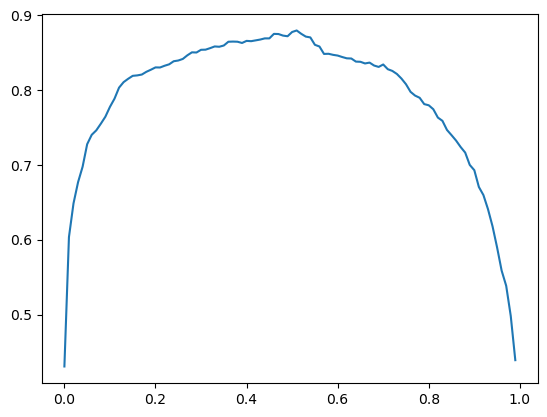

In [211]:
plt.plot(df_scores.threshold, df_scores.f1)

In [213]:
df_scores.set_index('threshold').f1.argmax()

51

## Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

        KFold(n_splits=5, shuffle=True, random_state=1)

- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

0.003
0.030
0.090
0.140

### Define Trainand Predict Functions

In [222]:
# Function to convert dataset to dictionary and train model
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

# Function to make predictions based on trained model above
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

#     create feature matrix using vectorizer
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [223]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [228]:
scores = []

for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        # Set target variables
        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=1.0)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

print(' %.3f +- %.3f' % ( np.mean(scores), np.std(scores)))

 0.981 +- 0.003


In [229]:
scores

[0.9784719357588758,
 0.9774816378589966,
 0.9828063130890636,
 0.9795786626512744,
 0.9863691863691864]

## Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: [0.01, 0.1, 0.5, 10]
- Initialize KFold with the same parameters as previously
- Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

0.01
0.1
0.5
10


In [232]:
# To see progress of your iteration
from tqdm.auto import tqdm

In [237]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in tqdm([0.01, 0.1, 0.5, 10]):  
    
    scores = []
    
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        # Set target variables
        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.981 +- 0.003
C=0.1 0.981 +- 0.003
C=0.5 0.981 +- 0.003
C=10 0.981 +- 0.003


In [235]:
scores

[0.9784719357588758,
 0.9774816378589966,
 0.9828063130890636,
 0.9795786626512744,
 0.9863691863691864]